# CS 594 Project 

In [2]:
## import lib 

from helper import read_csv, calculate_spread, calculate_height, filter_points, cal_nn_distance, run_queries, generate_random_queries
import numpy as np
from tree.points import Point
from tree import QuardTree
import pandas as pd
import time
import random
import random
import time
import numpy as np
from helper import read_csv, calculate_spread, calculate_height, filter_points
import numpy as np
from tree.points import Point
from tree import QuardTree
from tree.quardtreeDynamic import QuardTreeDynamic
import pandas as pd
import random


## Question 1

 Implement the quad-tree (not the compressed one) we have seen in class for the approximate
 nearest neighbor queries. Your quad-tree should work in any dimension. Let Dquad be the
 quad tree data structure.
 In Dataset youwillfindasetofpoints(pleasecopypasteitintoatxtfileinyourmachine).
 Your code should read this file line by line containing a set P of n points. The first line
 contains the dimension d, and every other line contains a tuple x1,x2,...,xd that represents
 the point x ∈ Rd with coordinates x1,...,xd. Your implementation should construct the
 quadtree for ANN queries (as we have seen in class) over the set of points P. Report the
 construction time. What is the spread of the point set? What is the height of the tree?
 Describe the relation between the spread and the height of the tree

In [22]:
# reading csv file
dim, data_points = read_csv("./sample_data/data.csv")

# building quard tree
st = time.time()
qt = QuardTree()
qt.build(points=data_points)
ed = time.time()

print(f"Construction Time : {ed-st} seconds")

Construction Time : 0.07599735260009766 seconds


In [23]:
## calculating spread and height
spread = calculate_spread(data_points)
print(f"Spread of dataset : {spread}")

height = calculate_height(qt.root)
print(f"Height of tree: {height}")

print(f"Relationship between spread and height, ceil(log(spread)): {np.ceil(np.log2(spread))} == height of tree ({height})")

Spread of dataset : 15550.613705736101
Height of tree: {height}
Relationship between spread and height, ceil(log(spread)): 14.0 == height of tree (14)


## Question 2

In [3]:
## sample eps and point as given in question
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]
points = [Point(500, 500), Point(1000, 1000), Point(30, 950), Point(0, 1020)]

distance_ann = cal_nn_distance(points, epsilons)

# plot distance 
pd.DataFrame(distance_ann).plot(kind='bar', xlabel="epsilons", ylabel="distances", title="Query Points")

{(500, 500): {0.05: 2.2600000000000104, 0.1: 2.2600000000000104, 0.15: 2.2600000000000104, 0.2: 2.2600000000000104, 0.25: 2.2600000000000104}, (1000, 1000): {0.05: 14.780236804598218, 0.1: 14.780236804598218, 0.15: 14.780236804598218, 0.2: 14.780236804598218, 0.25: 14.780236804598218}, (30, 950): {0.05: 10.294003108606482, 0.1: 10.294003108606482, 0.15: 10.294003108606482, 0.2: 10.294003108606482, 0.25: 10.294003108606482}, (0, 1020): {0.05: 31.455937436356948, 0.1: 31.455937436356948, 0.15: 31.455937436356948, 0.2: 31.455937436356948, 0.25: 31.455937436356948}}


In [ ]:
# running random quertines in given boxes for eps=0.1

# Set fixed epsilon
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep)

# Output the results
print(f"Average Distance in [0, 1000] x [0, 1000]: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000]: {avg_query_time_region1} seconds")

# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep)


print(f"Average Distance in [1000, 1500] x [1000, 1500]: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500]: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000]: 5.038783048977531
Average Query Time in [0, 1000] x [0, 1000]: 0.00011115694046020508 seconds
Average Distance in [1000, 1500] x [1000, 1500]: 391.12880102089
Average Query Time in [1000, 1500] x [1000, 1500]: 8.40003490447998e-05 seconds


## Question 3

1 . All points within a box
2. We will del all points one by one from quard tree

In [7]:
from tree.boundingBox import BoundingBox
import time

Average Time  0.00024255779054429795


<Axes: title={'center': 'ANN Query (500,500) result after deletion'}, xlabel='epsilon', ylabel='distance'>

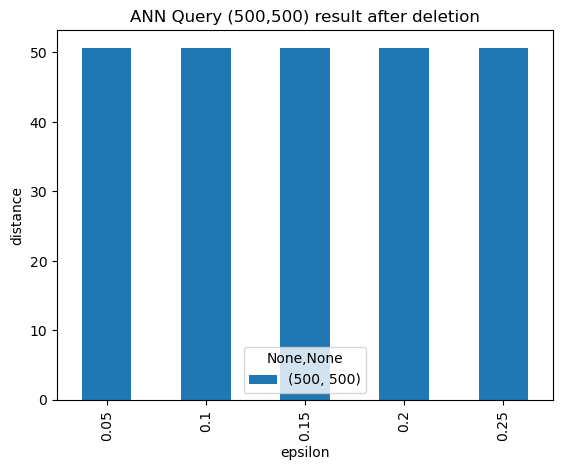

In [8]:
## Delete all outputs for given boxes

### given bounding box
bounding_box = BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)
# findinal all points to delete
filtered_points = filter_points(data_points, bounding_box=bounding_box)

# deleteting all points that are in the given box
st = time.time()
for point in filtered_points:
    qt.delete(point)
ed = time.time()

avg_time = (ed-st)/len(filtered_points)
print("Average Deletion Time for all points in box [450, 550] X [450, 550] ", avg_time)

# plot as in question 2
n_distance = cal_nn_distance([Point(500, 500)], epsilons)
pd.DataFrame(n_distance).plot(kind='bar', xlabel='epsilon', ylabel='distance', title='ANN Query (500,500) result after deletion')

Average Time  0.00027678268296378


<Axes: title={'center': 'ANN Query (1000,1000) result after deletion'}, xlabel='epsilon', ylabel='distance'>

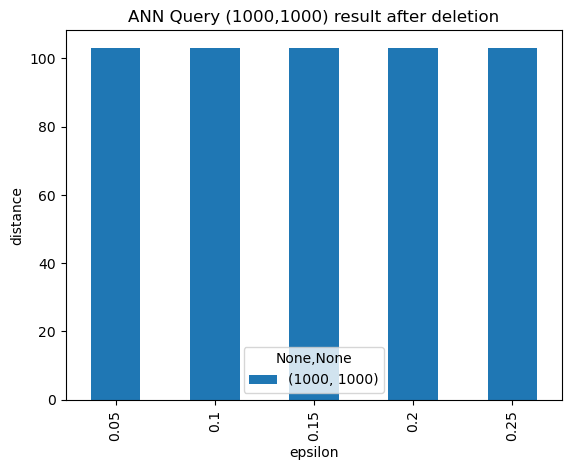

In [9]:
# same process for differnt box

### given bounding box
bounding_box = BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000)

# findinal all points to delete
filtered_points = filter_points(data_points, bounding_box=bounding_box)

# deleteting all points that are in the given box
st = time.time()
for point in filtered_points:
    qt.delete(point)
ed = time.time()

avg_time = (ed-st)/len(filtered_points)
print("Average Deletion Time for all points in box [900, 1000] X [900, 1000] ", avg_time)

# plot as in question 2
n_distance = cal_nn_distance([Point(1000, 1000)], epsilons)
pd.DataFrame(n_distance).plot(kind='bar', xlabel='epsilon', ylabel='distance', title='ANN Query (1000,1000) result after deletion')


Deletion futher till we need to reconstruct the tree

In [12]:
def sample_n_points(n, ignore_bbox=[], ignore_pts = []):
    random_points = []
    while len(random_points)!=n:
        s = random.choice(data_points)
        if s in random_points:
            continue
        if s in ignore_pts:
            continue
        for bbox in ignore_bbox:
            if bbox.contains_point(s):
                break
        else:
            random_points.append(s)
    return random_points

In [13]:
## total number of points to delete to trigge rebuild
num_del = qt.total_points/2 - qt.deleted_count+1

# sample num_del points for deletion
points = sample_n_points(num_del, [BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000),
                          BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)])

In [ ]:
# delete points till  total num_of points remaining in quard tree is 499
st = time.time()
for pt in points:
    qt.delete(pt)
ed = time.time()

print("Average del time before reconstruction :", (ed-st)/len(points))

Average del time before reconstruction : 0.00019953625393173132


In [16]:
print(f"Total number of points remaining in quard tree : {len(qt.points)}")

4999

In [17]:
## Deleting 1000 more points from quard tree

r_points = sample_n_points(1000, [BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000),
                          BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)], points)

# deleting points
st = time.time()
for pt in r_points:
    qt.delete(pt)
ed = time.time()

print("Average del time for 1000 points after reconstruction :", (ed-st)/len(points))

In [ ]:
## Quering 1000 random query as per given box

# Set fixed epsilon
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep)

print(f"Average Distance in [0, 1000] x [0, 1000] after deletion and reconstruction: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000] after deletion and reconstruction: {avg_query_time_region1} seconds")


# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep)

print(f"Average Distance in [1000, 1500] x [1000, 1500] after deletion and reconstruction: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500] after deletion and reconstruction: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000]: 8.056844508089927
Average Query Time in [0, 1000] x [0, 1000]: 9.399795532226562e-05 seconds
Average Distance in [1000, 1500] x [1000, 1500]: 447.5097972922794
Average Query Time in [1000, 1500] x [1000, 1500]: 6.400012969970703e-05 seconds


## Question 4

In [1]:
# xreate a dynamic quard tree as given in document
qtd = QuardTreeDynamic()

In [2]:
## Inserting 6000 points into dynamic quard tree from the given box ([0,1000] X [0,1000])
r_points = generate_random_queries(0,1000,0,1000,6000)

# insert points 
for pt in r_points:
    qtd.insert(pt)

In [3]:
## Run query for givcen eps and points sample 
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]
points = [Point(500, 500), Point(1000, 1000), Point(30, 950), Point(0, 1020)]

ann_distance = cal_nn_distance(points, epsilons, qtd)
# plot
pd.DataFrame(ann_distance).plot(kind='bar', xlabel="epsilons", ylabel="distances", title="Distance from Query Points after insertions")

{(500, 500): {0.05: 4.821473361721113, 0.1: 4.821473361721113, 0.15: 4.821473361721113, 0.2: 4.821473361721113, 0.25: 4.821473361721113}, (1000, 1000): {0.05: 6.685937420397057, 0.1: 6.685937420397057, 0.15: 6.685937420397057, 0.2: 6.685937420397057, 0.25: 6.685937420397057}, (30, 950): {0.05: 7.182442617250047, 0.1: 7.182442617250047, 0.15: 7.182442617250047, 0.2: 7.182442617250047, 0.25: 7.182442617250047}, (0, 1020): {0.05: 20.618467659652207, 0.1: 20.618467659652207, 0.15: 20.618467659652207, 0.2: 20.618467659652207, 0.25: 20.618467659652207}}


In [5]:
import random
import time
import numpy as np

# Function to generate random queries in a given region
def generate_random_queries(x_min, x_max, y_min, y_max, num_queries=1000):
    return [Point(random.uniform(x_min, x_max), random.uniform(y_min, y_max)) for _ in range(num_queries)]

# Function to run queries and calculate average query time and distance
def run_queries(region_min, region_max, ep, tree, num_queries=1000 ):
    distances = []
    query_times = []

    # Generate random queries within the specified region
    queries = generate_random_queries(region_min[0], region_max[0], region_min[1], region_max[1], num_queries)

    for query in queries:
        # Record the start time for query processing
        start_time = time.time()

        # Search for the nearest neighbor
        nearest_point = tree.searchANN(query, ep)

        # Record the time it took to process the query
        query_time = time.time() - start_time
        query_times.append(query_time)

        # Calculate and store the distance
        distance = query.cal_distance(nearest_point)
        distances.append(distance)

    # Calculate the average distance and average query time
    avg_distance = np.mean(distances)
    avg_query_time = np.mean(query_times)

    return avg_distance, avg_query_time

# Set fixed epsilon
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep, qtd)
print(f"Average Distance in [0, 1000] x [0, 1000] from dynamic quard tree: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000] from dynamic quard tree: {avg_query_time_region1} seconds")


# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep, qtd)


print(f"Average Distance in [1000, 1500] x [1000, 1500] from dynamic quard tree: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500] from dynamic quard tree: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000]: 6.470655854193323
Average Query Time in [0, 1000] x [0, 1000]: 0.00032520222663879396 seconds
Average Distance in [1000, 1500] x [1000, 1500]: 385.4407653448758
Average Query Time in [1000, 1500] x [1000, 1500]: 0.0002909998893737793 seconds


In [7]:
# add 20k points from box [1000, 2000] X [1000, 2000] into dynamic quard tree 
r_points = generate_random_queries(1000,2000,1000,2000,20000)

for pt in r_points:
    qtd.insert(pt)

In [ ]:
region_min = (1000, 1000)
region_max = (2000, 2000)
avg_distance_region, avg_query_time_region = run_queries(region_min, region_max, ep, qtd)
# Output the results
print(f"Average Distance in [1000, 2000] x[1000, 2000] after insertion 20k values: {avg_distance_region}")
print(f"Average Query Time in [1000, 2000] x [1000, 2000] after insertion 20k values: {avg_query_time_region} seconds")

Average Distance in [1000, 2000] x [0, 1000]: 3.4379701956757382
Average Query Time in [1000, 2000] x [0, 1000]: 0.00038608789443969724 seconds
